In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
# pip install mat73

In [5]:
# import mat73

In [6]:
# mat1=mat73.loadmat('/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_DB2_sEMG_preprocess_data.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_valid=mat1['Valid_raw_data']
# print('raw_Train_data',nina_raw_train)

In [7]:
# nina_raw_test=mat1['Testing_process_data'] 
# # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [8]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Train.csv", nina_raw_train, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [9]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Test.csv", nina_raw_test, delimiter=",")

In [10]:
N_FEATURES = 12

In [11]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'Class_label']


In [12]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [13]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [14]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [15]:
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/Total_process_TT/'
# olsson preprocessing path
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nb_FT_olsson/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nb_olsson/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nbov_olsson/Total_process_TT/'
path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nb_D2_HT_olsson/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nb_FT_whole_olsson/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/Total_process_TT/'

In [16]:
# file_path_train=path+'nina_pro_DB2_Train'+'.'+'csv'
# file_path_train=path+'nina_pro_nb_FT_DB2_Train'+'.'+'csv'
# file_path_train=path+'nina_pro_nb_DB2_Train'+'.'+'csv'
# file_path_train=path+'nina_pro_nbov_DB2_Train'+'.'+'csv'
file_path_train=path+'nina_pro_nb_D2_HT_DB2_Train'+'.'+'csv'
# file_path_train=path+'nina_pro_noprep_DB2_Train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nb_D2_HT_olsson/Total_process_TT/nina_pro_nb_D2_HT_DB2_Train.csv


In [17]:
# file_path_test=path+'nina_pro_DB2_Test'+'.'+'csv'
# file_path_test=path+'nina_pro_nb_FT_DB2_Test'+'.'+'csv'
# file_path_test=path+'nina_pro_nb_DB2_Test'+'.'+'csv'
# file_path_test=path+'nina_pro_nbov_DB2_Test'+'.'+'csv'
file_path_test=path+'nina_pro_nb_D2_HT_DB2_Test'+'.'+'csv'
# file_path_test=path+'nina_pro_noprep_DB2_Test'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nb_D2_HT_olsson/Total_process_TT/nina_pro_nb_D2_HT_DB2_Test.csv


In [18]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 39200000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,9.007300e-09,2.718700e-07,7.785900e-08,1.959900e-07,1.860100e-07,1.181700e-07,2.508900e-07,2.970800e-07,2.498700e-07,4.142800e-07,2.623900e-07,8.824000e-08,1.0
1,3.167800e-06,3.315400e-06,1.424900e-06,2.136800e-06,2.498700e-06,3.041000e-07,2.768600e-06,5.747900e-06,1.658800e-07,2.722700e-06,6.105500e-07,3.587100e-06,1.0
2,7.333900e-07,3.795000e-06,1.876700e-06,3.700900e-06,3.834400e-06,2.430400e-06,7.112400e-06,2.399100e-06,4.361000e-07,6.212700e-06,2.628700e-06,6.698200e-06,1.0
3,9.082300e-06,2.858400e-06,1.602700e-07,9.194800e-07,3.427200e-06,1.624200e-06,7.876900e-06,1.098400e-05,4.533200e-07,5.899900e-06,1.097500e-06,1.604500e-05,1.0
4,1.217100e-05,1.578000e-06,2.905500e-07,1.787800e-06,3.879000e-06,2.909600e-06,6.626800e-06,7.812700e-06,1.083900e-06,3.720500e-06,1.022800e-06,1.961400e-05,1.0
5,1.161800e-05,2.667000e-06,4.099200e-07,6.931300e-07,4.699800e-06,3.006300e-06,4.696600e-06,1.292900e-05,1.417100e-07,2.485600e-06,9.532300e-07,9.741100e-06,1.0
6,8.454500e-06,1.889100e-06,2.608500e-06,4.694000e-06,3.096700e-06,2.398100e-06,1.714000e-06,2.065500e-05,1.340000e-07,1.751300e-06,8.410400e-07,8.665100e-06,1.0
7,4.844700e-06,2.679400e-06,2.381500e-06,3.712600e-06,3.223600e-06,1.623500e-06,8.201100e-07,1.140700e-05,2.050600e-07,2.086600e-06,3.499700e-06,1.521900e-05,1.0
8,3.124800e-06,3.030200e-06,5.650900e-07,4.295800e-09,3.510900e-06,4.087900e-06,1.273500e-06,2.432000e-06,9.848100e-07,9.887100e-07,6.257800e-07,1.121300e-05,1.0
9,2.575100e-07,1.788500e-06,8.863000e-07,1.092000e-06,9.398500e-07,2.625600e-06,7.417700e-06,2.561600e-06,1.657400e-06,2.525500e-08,3.905400e-06,2.042400e-06,1.0


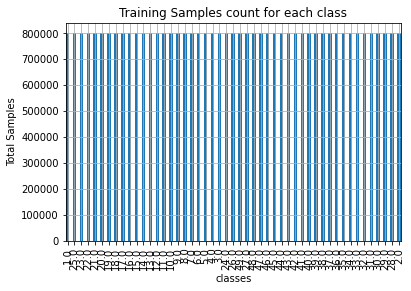

In [19]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [20]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 19600000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,7.927400e-07,1.466000e-07,3.123600e-07,4.173500e-08,2.593100e-07,3.936300e-08,8.302500e-09,2.553100e-06,3.784900e-07,3.175700e-07,2.406000e-07,0.000008,1.0
1,4.660300e-06,7.466500e-06,3.204200e-06,1.707600e-06,2.753200e-06,1.370600e-06,1.607200e-06,1.190700e-05,1.890700e-06,2.147000e-06,2.626900e-06,0.000004,1.0
2,8.314200e-06,5.435600e-06,5.957400e-06,7.543200e-07,3.556500e-06,2.750800e-06,5.545000e-07,9.231300e-06,1.740700e-06,2.708900e-06,3.251800e-06,0.000006,1.0
3,9.259500e-06,7.806400e-07,5.065400e-06,5.017800e-08,1.879900e-06,2.519800e-06,4.079900e-07,4.581600e-06,1.622700e-07,2.212100e-06,4.256600e-07,0.000008,1.0
4,9.400100e-06,2.128400e-06,5.117800e-06,3.580300e-07,2.808400e-06,2.140200e-06,2.287600e-06,9.452800e-07,5.574200e-08,3.815600e-06,2.663200e-06,0.000006,1.0
5,1.002400e-05,3.279000e-06,5.270500e-06,1.145200e-06,1.411600e-06,1.060400e-06,5.147200e-06,5.870700e-06,1.534300e-06,2.782500e-06,2.991700e-06,0.000005,1.0
6,9.894900e-06,9.236500e-07,4.617400e-06,1.453100e-07,1.864700e-06,1.262100e-06,3.308800e-06,2.040200e-06,2.192100e-07,4.915000e-07,2.988200e-06,0.000004,1.0
7,9.477800e-06,5.694600e-07,3.454300e-06,2.930900e-06,2.407200e-06,9.858300e-09,7.386700e-07,3.540700e-07,2.650500e-06,1.279500e-06,2.321200e-06,0.000002,1.0
8,5.672800e-06,1.776400e-06,1.325100e-06,2.065700e-06,2.010700e-06,1.331600e-06,7.773400e-07,2.483200e-06,1.331100e-06,2.860100e-06,4.946400e-07,0.000006,1.0
9,1.640800e-06,1.883100e-06,1.558600e-06,8.893600e-07,7.831100e-07,5.598900e-07,2.942400e-06,1.845200e-06,8.646700e-07,2.261100e-06,8.992700e-07,0.000013,1.0


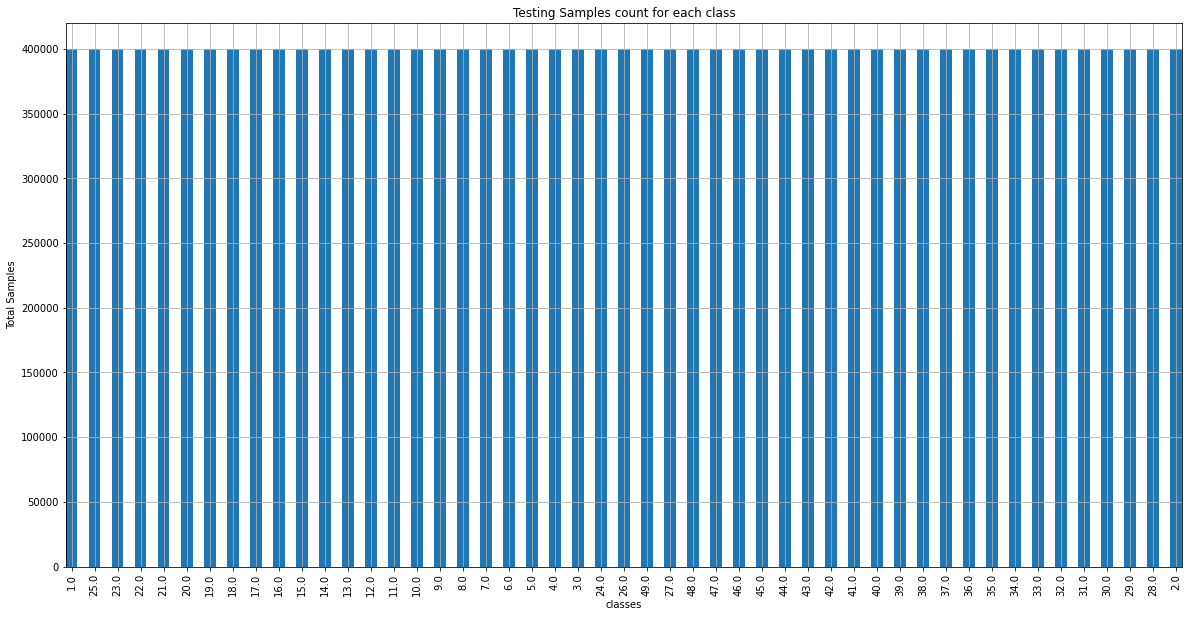

In [21]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [22]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,1.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00001,0.00000,0.00001,1.00000
3,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00001,0.00000,0.00002,1.00000
4,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000,0.00000,0.00002,1.00000


In [23]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [24]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [25]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,-0.34417,-0.34753,-0.42061,-0.36402,-0.51710,-0.19223,-0.28489,-0.56586,-0.35662,-0.28397,-0.41066,-0.53370,1.00000
1,-0.30502,-0.27189,-0.37707,-0.30525,-0.30355,-0.18797,-0.25839,-0.44710,-0.35880,-0.26434,-0.39145,-0.18617,1.00000
2,-0.33519,-0.25997,-0.36247,-0.25788,-0.18022,-0.13927,-0.21267,-0.52006,-0.35178,-0.23466,-0.28007,0.12284,1.00000
3,-0.23171,-0.28325,-0.41794,-0.34211,-0.21782,-0.15773,-0.20462,-0.33303,-0.35133,-0.23732,-0.36457,1.05123,1.00000
4,-0.19342,-0.31507,-0.41373,-0.31582,-0.17610,-0.12829,-0.21778,-0.40212,-0.33494,-0.25585,-0.36870,1.40572,1.00000


In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,1.00000
1,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,1.00000
2,0.00001,0.00001,0.00001,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00001,1.00000
3,0.00001,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,1.00000
4,0.00001,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,1.00000


In [27]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [28]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,-0.33445,-0.35064,-0.41303,-0.36869,-0.51033,-0.19404,-0.28744,-0.51671,-0.35328,-0.28479,-0.41186,0.21825,1.00000
1,-0.28652,-0.16871,-0.31956,-0.31824,-0.28005,-0.16354,-0.27061,-0.31292,-0.31396,-0.26923,-0.28017,-0.15398,1.00000
2,-0.24123,-0.21919,-0.23058,-0.34711,-0.20588,-0.13193,-0.28169,-0.37121,-0.31786,-0.26445,-0.24568,0.06813,1.00000
3,-0.22951,-0.33489,-0.25941,-0.36844,-0.36069,-0.13722,-0.28324,-0.47251,-0.35890,-0.26868,-0.40165,0.24866,1.00000
4,-0.22777,-0.30139,-0.25772,-0.35911,-0.27495,-0.14591,-0.26345,-0.55173,-0.36167,-0.25504,-0.27817,0.06885,1.00000


In [29]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size                C1       C2       C3       C4       C5       C6       C7  \
0        -0.34417 -0.34753 -0.42061 -0.36402 -0.51710 -0.19223 -0.28489   
1        -0.30502 -0.27189 -0.37707 -0.30525 -0.30355 -0.18797 -0.25839   
2        -0.33519 -0.25997 -0.36247 -0.25788 -0.18022 -0.13927 -0.21267   
3        -0.23171 -0.28325 -0.41794 -0.34211 -0.21782 -0.15773 -0.20462   
4        -0.19342 -0.31507 -0.41373 -0.31582 -0.17610 -0.12829 -0.21778   
...           ...      ...      ...      ...      ...      ...      ...   
39199995 -0.19887 -0.17661  0.71765 -0.26502 -0.35489 -0.03859 -0.25370   
39199996 -0.04575 -0.05746  0.94514 -0.04289 -0.30175 -0.05197 -0.24014   
39199997 -0.01147 -0.14412  2.60008 -0.06886 -0.13212 -0.10474 -0.24507   
39199998 -0.05746 -0.23878  0.89670 -0.23519 -0.35006 -0.11633 -0.22811   
39199999 -0.19230 -0.31572 -0.41648 -0.33446 -0.40166 -0.13218 -0.25538   

               C8       C9      C10      C11      C12  Class_label  \
0        -0.565

In [30]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [31]:
# The number of steps within one time segment
TIME_PERIODS = 5000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 5000

In [32]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (7839, 5000, 12)
7839 training samples
y_train shape:  (7839,)
5000
12
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]
x_train shape: (5000, 12)
input_shape: (5000, 12)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (7839, 49)


In [33]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (3919, 5000, 12)
3919 testing samples
y_test shape:  (3919,)


In [34]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 50, 100
n_depth=12
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (7839, 50, 100, 12)
x_test shape:  (3919, 50, 100, 12)
n_outputs 49


In [35]:
# # n_steps, n_length = 20, 25
# # n_steps, n_length= 10, 50
# # n_steps, n_length= 16, 32
# n_steps, n_length = 50, 200
# n_depth,n_sub =12,1
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_train shape: ', x_train.shape)
# # x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# # print('x_valid shape: ', x_valid.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_test shape: ', x_test.shape)
# n_outputs = y_train_hot.shape[1]
# print('n_outputs',n_outputs)

In [36]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 60.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [37]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [38]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [39]:
verbose, epochs, batch_size = 0, 130,32

In [40]:
# model = Sequential()
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth,n_sub)))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(MaxPooling2D(pool_size=(8,1),strides=(2,1))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [41]:
# model = Sequential()
# model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
# model.add(Activation('tanh'))
# model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dropout(0.2093))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [42]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=3,kernel_regularizer=l1(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(TimeDistributed(MaxPooling1D(pool_size=4,strides=2)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Activation('relu')))
model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

In [43]:
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
# sgd=optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN98X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 50, 34, 64)        6976      
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 34, 64)        256       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 50, 16, 64)        0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 50, 16, 64)        0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 50, 8, 64)         20544     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 8, 64)         256       
_________________________________________________________________
time_distributed_4 (TimeDist (None, 50, 8, 64)         0

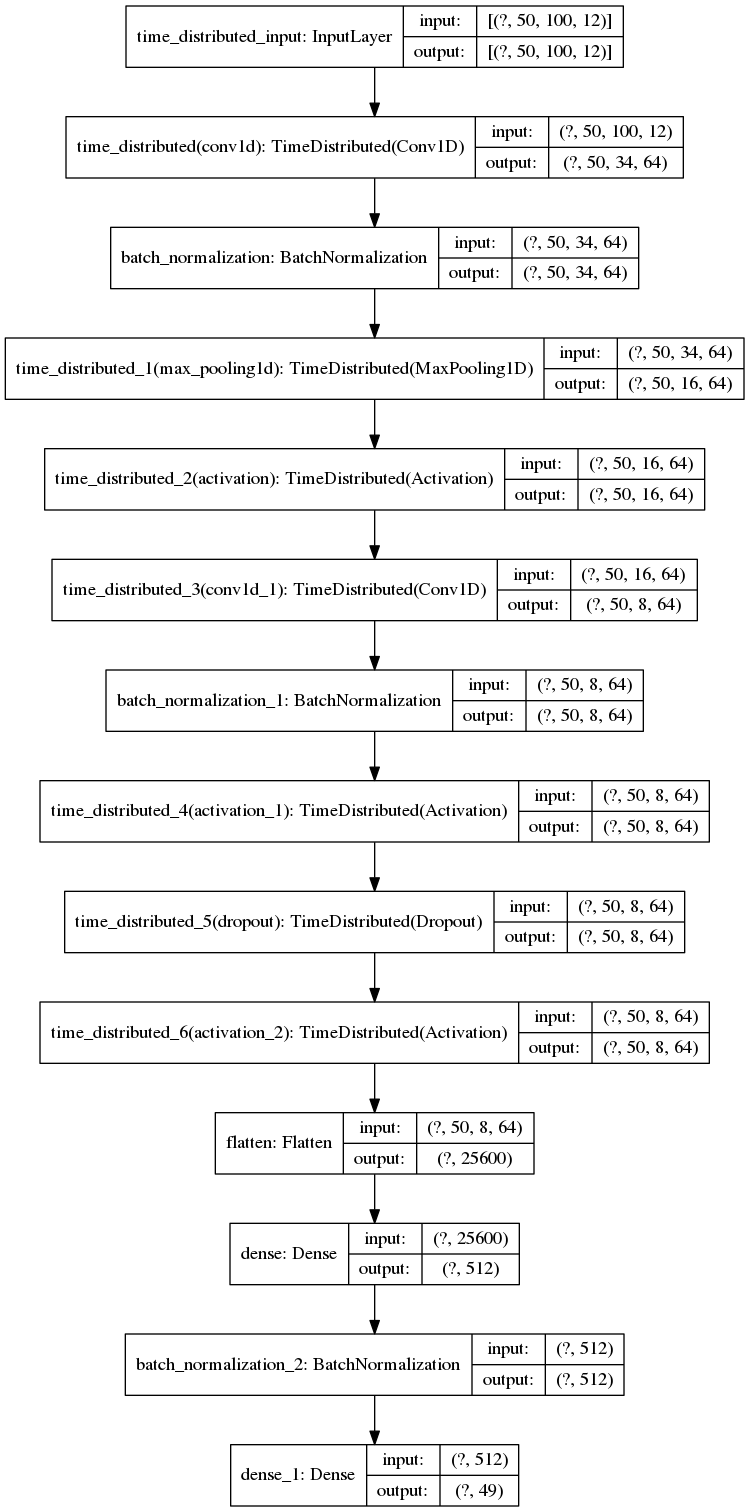

In [44]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN98X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [45]:
#     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN98X100/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)


Epoch 1/130
245/245 [==============================] - ETA: 0s - loss: 3.0535 - accuracy: 0.2541
Epoch 00001: val_accuracy improved from -inf to 0.34167, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN98X100/checkpoint.hdf5
245/245 [==============================] - 26s 107ms/step - loss: 3.0535 - accuracy: 0.2541 - val_loss: 2.5298 - val_accuracy: 0.3417 - lr: 0.0010
Epoch 2/130
244/245 [============================>.] - ETA: 0s - loss: 2.3206 - accuracy: 0.3940
Epoch 00002: val_accuracy improved from 0.34167 to 0.42868, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN98X100/checkpoint.hdf5
245/245 [==============================] - 4s 16ms/step - loss: 2.3197 - accuracy: 0.3939 - val_loss: 2.1337 - val_accuracy: 0.4287 - lr: 0.0010
Epoch 3/130
245/245 [==============================] - ETA: 0s - loss: 1.9405 - accuracy: 0.4782
Epoch 00003: val_accuracy improved from 0.42868 to 0.48941, saving model to /media/naveen/nav/mat_codes/nina

Epoch 53/130
244/245 [============================>.] - ETA: 0s - loss: 0.1754 - accuracy: 0.9873
Epoch 00053: val_accuracy did not improve from 0.66650
245/245 [==============================] - 4s 16ms/step - loss: 0.1754 - accuracy: 0.9872 - val_loss: 2.6303 - val_accuracy: 0.5376 - lr: 0.0010
Epoch 54/130
242/245 [============================>.] - ETA: 0s - loss: 0.1612 - accuracy: 0.9934
Epoch 00054: val_accuracy did not improve from 0.66650
245/245 [==============================] - 4s 16ms/step - loss: 0.1611 - accuracy: 0.9934 - val_loss: 2.5469 - val_accuracy: 0.5422 - lr: 0.0010
Epoch 55/130
243/245 [============================>.] - ETA: 0s - loss: 0.1557 - accuracy: 0.9933
Epoch 00055: val_accuracy did not improve from 0.66650
245/245 [==============================] - 4s 17ms/step - loss: 0.1555 - accuracy: 0.9934 - val_loss: 2.5077 - val_accuracy: 0.5575 - lr: 0.0010
Epoch 56/130
241/245 [============================>.] - ETA: 0s - loss: 0.1565 - accuracy: 0.9927
Epoch 00

242/245 [============================>.] - ETA: 0s - loss: 0.0644 - accuracy: 1.0000
Epoch 00107: val_accuracy did not improve from 0.66650
245/245 [==============================] - 4s 15ms/step - loss: 0.0644 - accuracy: 1.0000 - val_loss: 2.3570 - val_accuracy: 0.5922 - lr: 1.0000e-04
Epoch 108/130
245/245 [==============================] - ETA: 0s - loss: 0.0636 - accuracy: 1.0000
Epoch 00108: val_accuracy did not improve from 0.66650
245/245 [==============================] - 4s 15ms/step - loss: 0.0636 - accuracy: 1.0000 - val_loss: 2.3033 - val_accuracy: 0.6024 - lr: 1.0000e-04
Epoch 109/130
244/245 [============================>.] - ETA: 0s - loss: 0.0625 - accuracy: 1.0000
Epoch 00109: val_accuracy did not improve from 0.66650
245/245 [==============================] - 4s 15ms/step - loss: 0.0625 - accuracy: 1.0000 - val_loss: 2.3325 - val_accuracy: 0.5979 - lr: 1.0000e-04
Epoch 110/130
244/245 [============================>.] - ETA: 0s - loss: 0.0614 - accuracy: 1.0000
Epoch 

In [46]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 13
train accuracy and validation accuracy 0.9996172785758972 0.6664965748786926


In [47]:
model.save('/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN98X100/CNN_LSTM_nina_5X97')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/CNN98X100/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


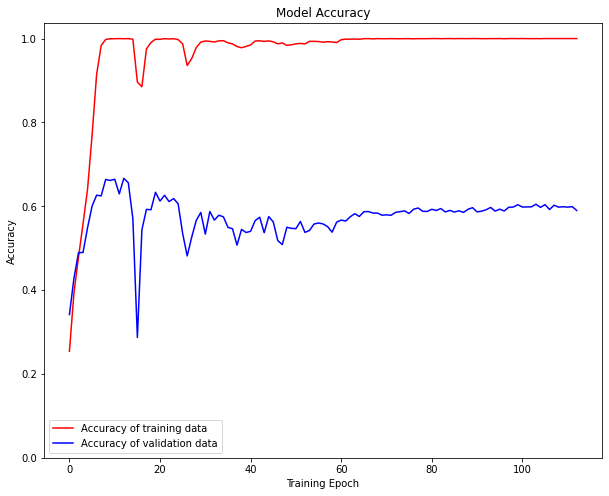

In [48]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr
<class 'list'>


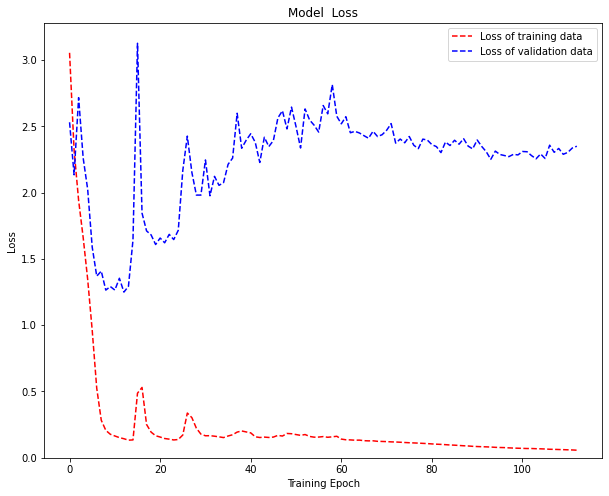

In [49]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
print(type(history.history['loss']))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [50]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

123/123 [==============================] - 1s 6ms/step - loss: 1.2493 - accuracy: 0.6665
test_accuracy 0.6664965748786926


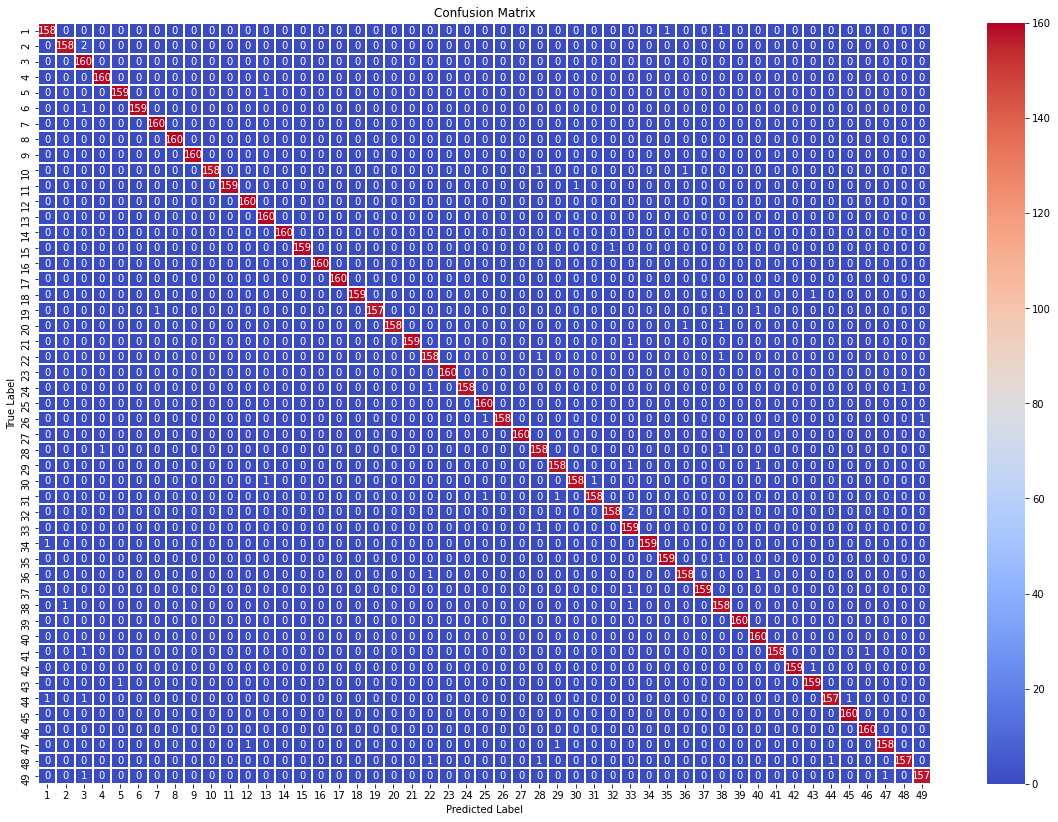

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.99      0.99      0.99       160
           2       0.96      1.00      0.98       160
           3       0.99      1.00      1.00       160
           4       0.99      0.99      0.99       160
           5       1.00      0.99      1.00       160
           6       0.99      1.00      1.00       160
           7       1.00      1.00      1.00       160
           8       1.00      1.00      1.00       160
           9       1.00      0.99      0.99       160
          10       1.00      0.99      1.00       160
          11       0.99      1.00      1.00       160
          12       0.99      1.00      0.99       160
          13       1.00      1.00      1.00       160
          14       1.00      0.99      1.00       160
          15       1.00      1.00      1.00       160
          16       1.00      1.00      1.00       160
          17       1.00    

In [51]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

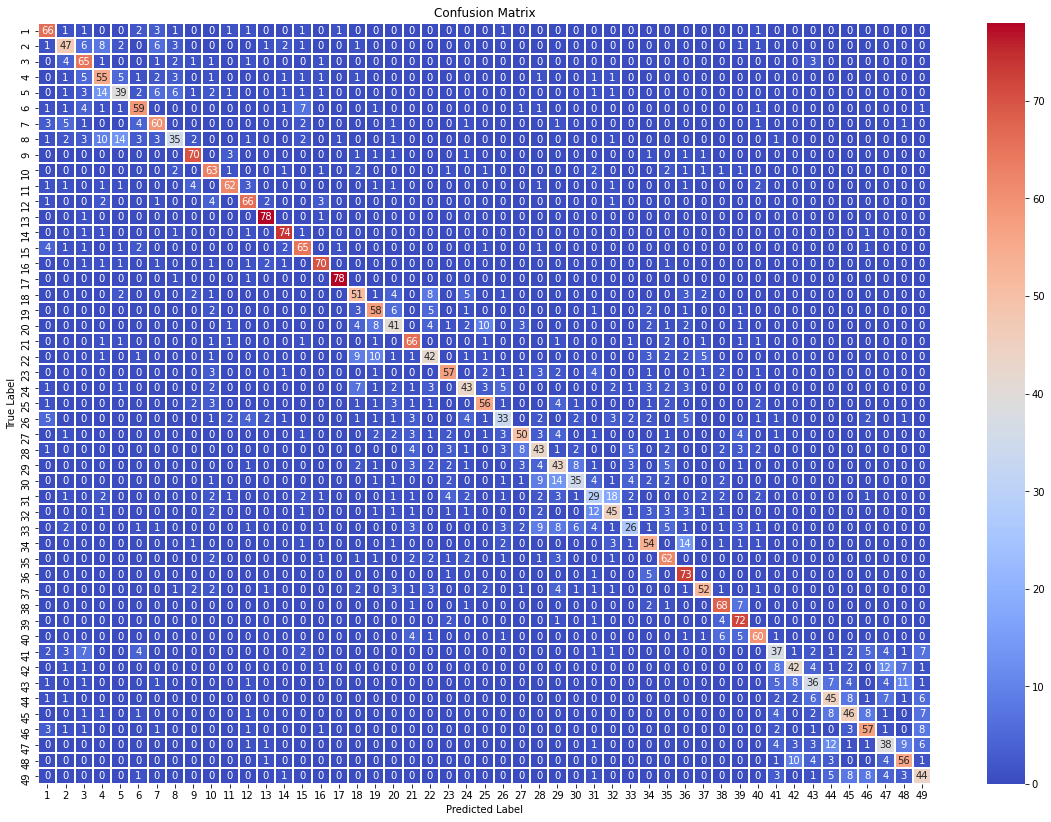

              precision    recall  f1-score   support

           0       0.71      0.82      0.76        80
           1       0.64      0.59      0.61        80
           2       0.63      0.81      0.71        80
           3       0.55      0.69      0.61        80
           4       0.57      0.49      0.53        80
           5       0.73      0.74      0.73        80
           6       0.70      0.75      0.72        80
           7       0.64      0.44      0.52        80
           8       0.82      0.88      0.85        80
           9       0.66      0.79      0.72        80
          10       0.85      0.78      0.81        80
          11       0.78      0.82      0.80        80
          12       0.89      0.97      0.93        80
          13       0.86      0.93      0.89        80
          14       0.73      0.81      0.77        80
          15       0.84      0.88      0.86        80
          16       0.96      0.97      0.97        80
          17       0.59    

In [52]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [53]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))